In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv(('global_power.csv'))

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# EDA

In [5]:
df.shape

(907, 27)

In [6]:
df.info

<bound method DataFrame.info of     country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Sola

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The features that needs encoding are country, country_long, name, gppd_idnr,Fuel_Type,other_fuel1,other_fuel2, owner, source, url, geolocation_source,generation_data_source as they are object data type and the ML model needs numeric datatype.

In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

It can be clearly seen that we have high number of null values in the datasets.

In [10]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id,generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

# Feature Selection

In [11]:
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [12]:
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

In [13]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [14]:
df["other_fuel2"].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [15]:
df["year_of_capacity_data"].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [16]:
df["generation_data_source"].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [17]:
df["other_fuel3"].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [18]:
df["wepp_id"].value_counts()

Series([], Name: wepp_id, dtype: int64)

In [19]:
df["generation_gwh_2013"].value_counts()

Series([], Name: generation_gwh_2013, dtype: int64)

In [20]:
df["generation_gwh_2019"].value_counts()

Series([], Name: generation_gwh_2019, dtype: int64)

In [21]:
df["estimated_generation_gwh"].value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

estimated_generation_gwh has all values as null values hence dropping this column

In [29]:
df.drop(columns=["other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"], axis=1,inplace=True)

In [30]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [31]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [32]:
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [33]:
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [34]:
df["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [35]:
df["url"].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

The columns "name", "gppd_idnr", "owner", "url" are all unique values and there is no impact of this feature on prediction hence we can drop these features

In [36]:
df.drop(columns=["name","gppd_idnr","owner","url"],axis=1,inplace=True)

In [37]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [38]:
df.shape

(907, 13)

In [39]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

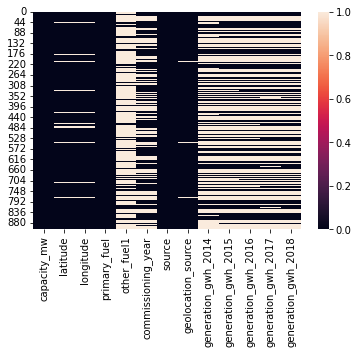

In [40]:
sns.heatmap(df.isnull())

In [41]:
#note - white lines in the heat map which indicates the missing values in the dataset.

In [42]:
df.skew().sort_values()

commissioning_year    -1.067949
latitude              -0.145866
longitude              1.112646
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
dtype: float64

In [43]:
df["other_fuel1"].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

# Treating null values using imputation techniques

In [44]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [45]:
df['latitude'].mean()

21.19791811846691

In [46]:
df["other_fuel1"].mode()

0    Oil
Name: other_fuel1, dtype: object

In [47]:
df["geolocation_source"].mode()

0    WRI
Name: geolocation_source, dtype: object

# Filling the null values

In [48]:
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())

In [49]:
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])

In [50]:
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [51]:
df["longitude"] = df["longitude"].fillna(df["longitude"].median())

In [52]:
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())

In [53]:
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())

In [54]:
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())

In [55]:
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())

In [56]:
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

In [57]:
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [58]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Hence we have treated the null values now and the data now shows no null values

<AxesSubplot:>

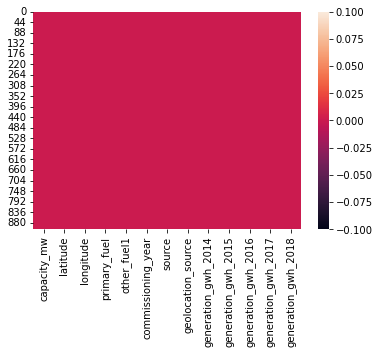

In [59]:
sns.heatmap(df.isnull())

In [60]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [61]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [64]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [65]:
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

# Feature Extraction

In [66]:
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [67]:
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

In [68]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


Statistical Summary

In [69]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

In [70]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [71]:
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)     

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


# Data Visualization

In [72]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

# Univariate Analysis

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


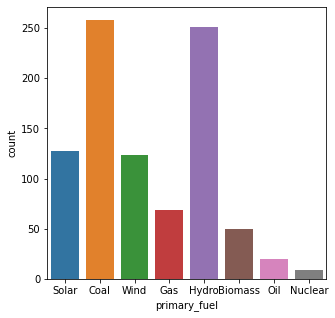

In [74]:
print(df['primary_fuel'].value_counts())   
plt.figure(figsize=(5,5))
sns.countplot(df['primary_fuel'])
plt.show()

In [75]:
#observation - In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


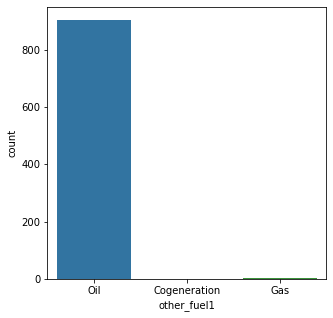

In [76]:
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


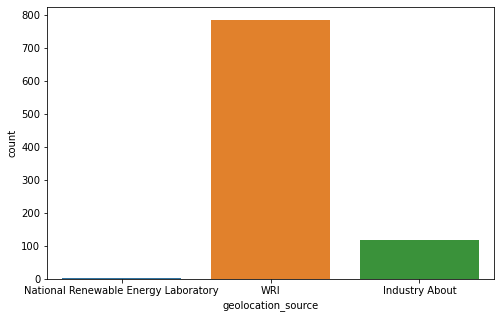

In [77]:
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])
plt.show()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


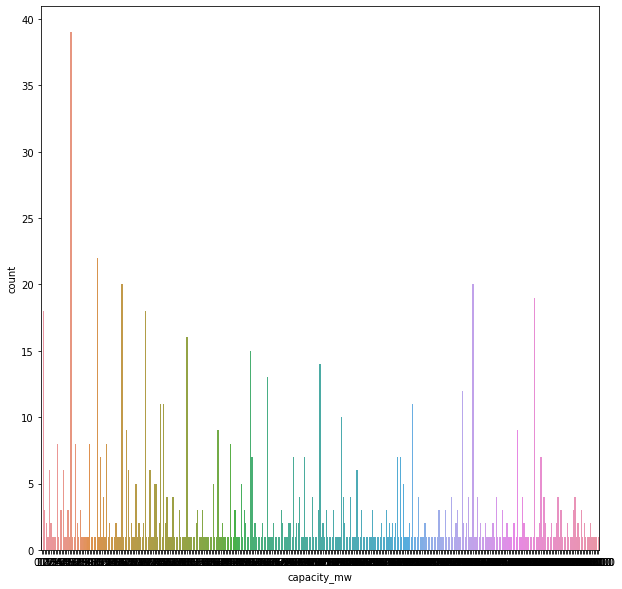

In [78]:
print(df['capacity_mw'].value_counts())  
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

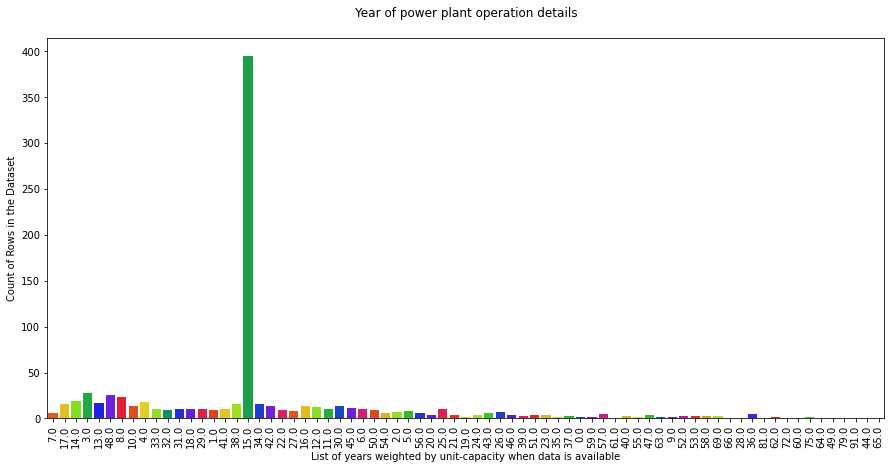

In [79]:
plt.figure(figsize=(15,7))
values = list(df['Power_plant_age'].unique())
diag = sns.countplot(df["Power_plant_age"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

# Checking the Distribution of the Dataset

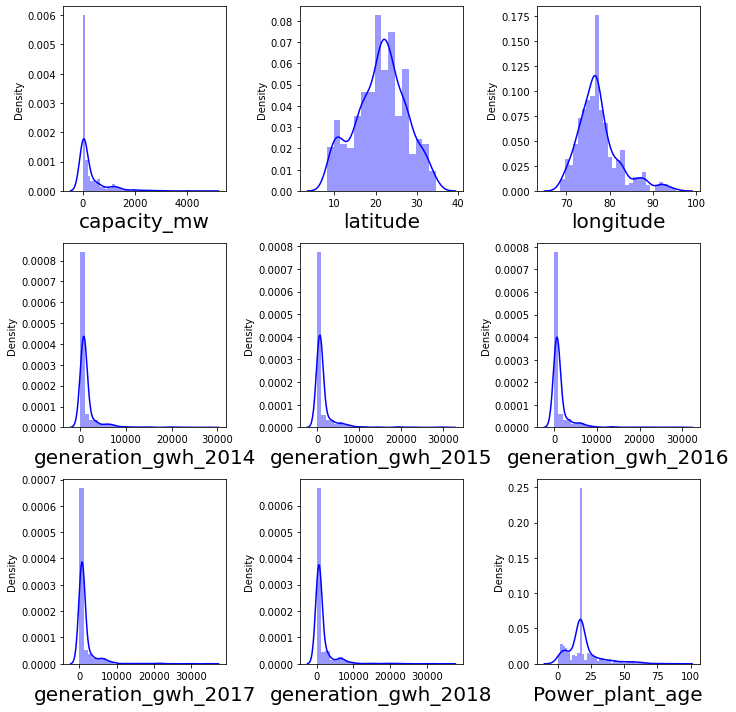

In [80]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here in the plots we can see that the data is not normally distributed. Outliers and skewness is present, which needs to be treated.

# Bivariate Analysis

Correlation between features and target 'Capacity_mw'

<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

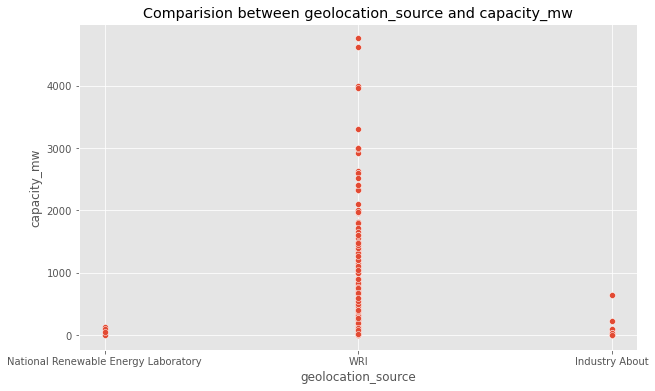

In [81]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

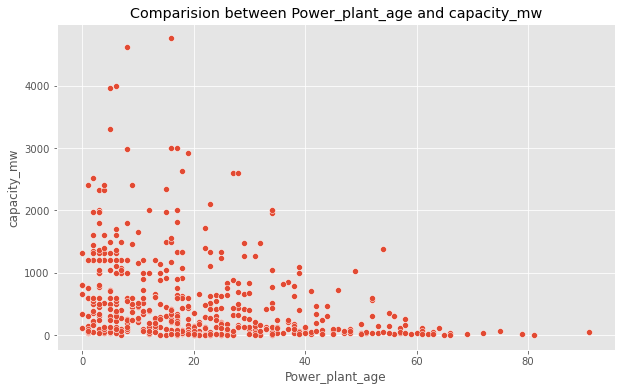

In [82]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(df['Power_plant_age'],df["capacity_mw"])

Here we can see a negative correlation

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

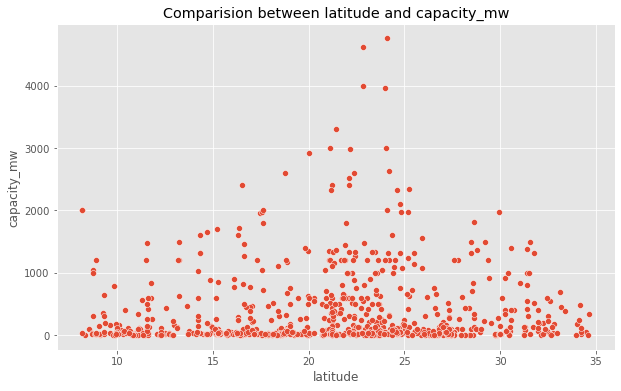

In [83]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

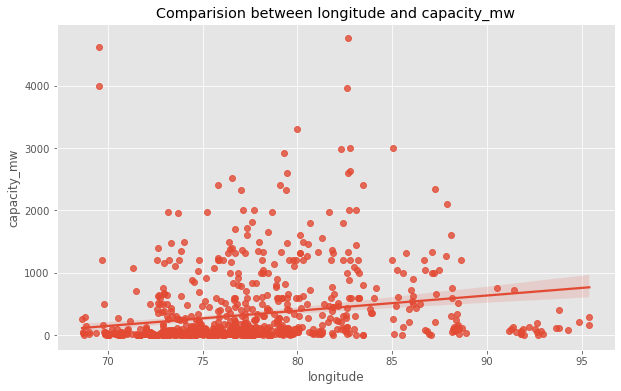

In [84]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

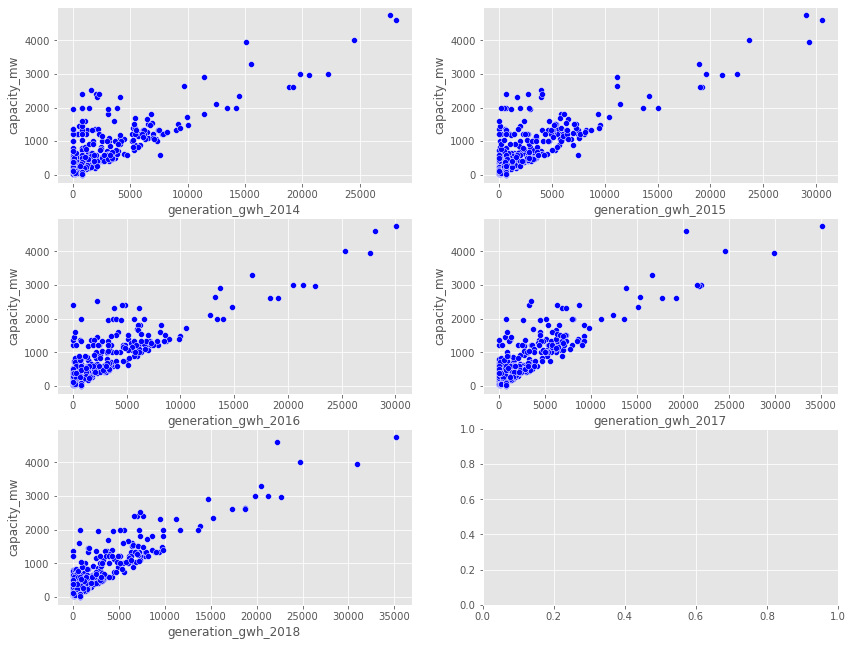

In [86]:
fig,axes=plt.subplots(3,2,figsize=(14,11))
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw",ax=axes[0,0],data = df,color="b")
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="b")
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="b")
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="b")
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[2,0],data=df,color="b")
plt.show()

This features shows a positive correlation. Here the electricity generation reported for the years has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

Correlation between features and target 'primary_fuel'

<AxesSubplot:title={'center':'Comparision between Power_plant_age and primary_fuel'}, xlabel='Power_plant_age', ylabel='primary_fuel'>

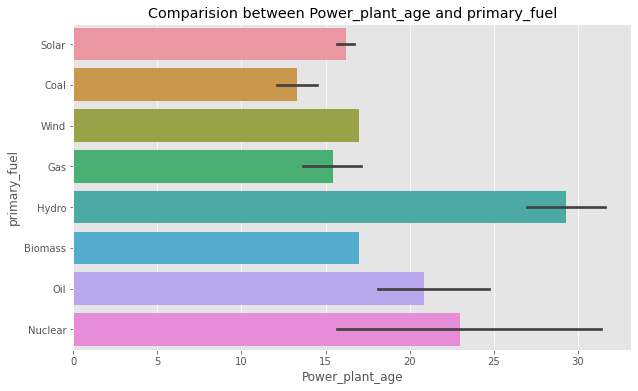

In [94]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and primary_fuel')
sns.barplot(df['Power_plant_age'],df["primary_fuel"])

<AxesSubplot:title={'center':'Comparision between latitude and primary_fuel'}, xlabel='latitude', ylabel='primary_fuel'>

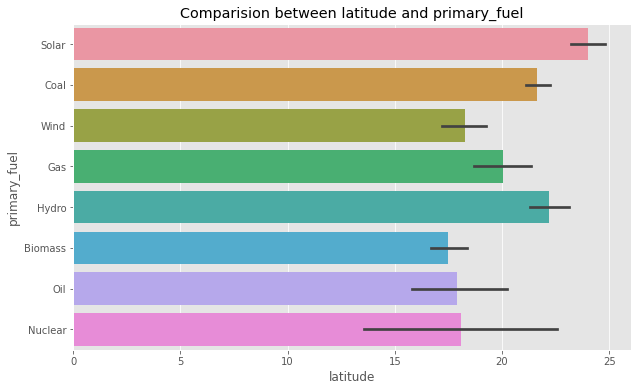

In [95]:
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(df['latitude'],df["primary_fuel"])

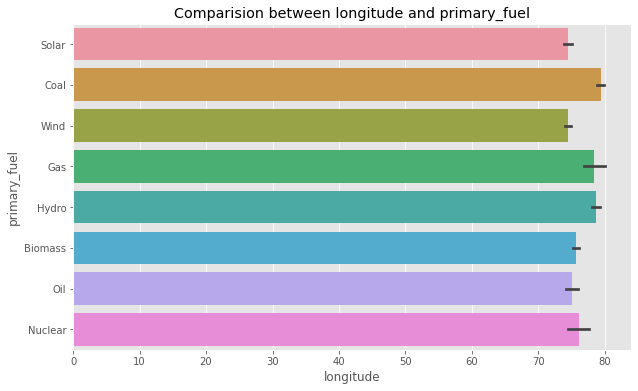

In [96]:
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and primary_fuel')
sns.barplot(df['longitude'],df["primary_fuel"]);

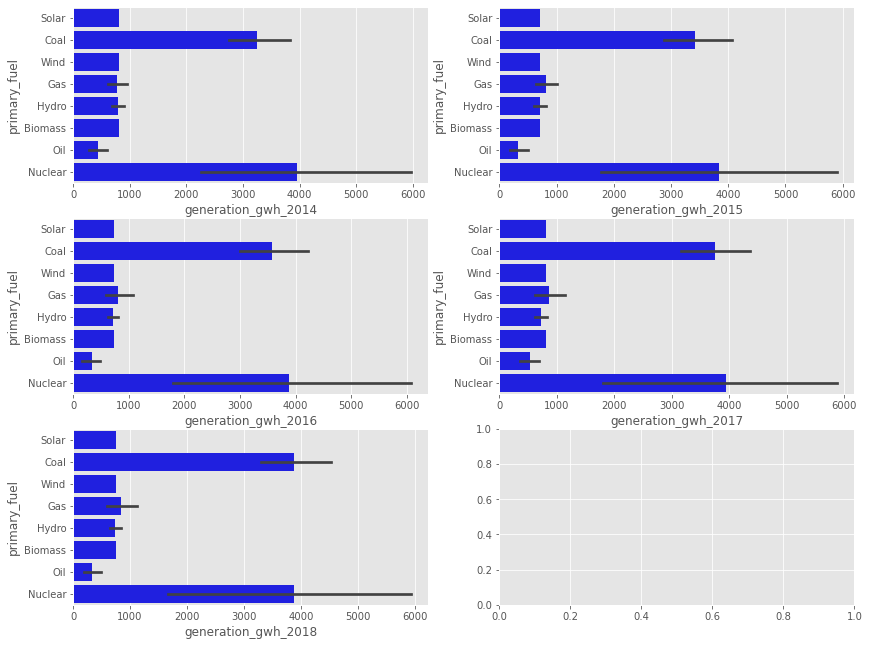

In [97]:
fig,axes=plt.subplots(3,2,figsize=(14,11))
sns.barplot(x = "generation_gwh_2014", y = "primary_fuel",ax=axes[0,0],data = df,color="b")
sns.barplot(x='generation_gwh_2015',y='primary_fuel',ax=axes[0,1],data=df,color="b")
sns.barplot(x='generation_gwh_2016',y='primary_fuel',ax=axes[1,0],data=df,color="b")
sns.barplot(x='generation_gwh_2017',y='primary_fuel',ax=axes[1,1],data=df,color="b")
sns.barplot(x='generation_gwh_2018',y='primary_fuel',ax=axes[2,0],data=df,color="b")
plt.show()

Here we can see that the most used energy source in all the years is nuclear followed by coal

# Checking the relationship between both the targets

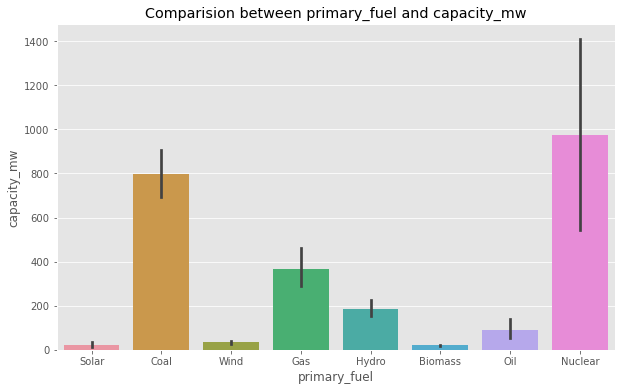

In [98]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

# Label Encoding

In [99]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [100]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [101]:
df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


In [102]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


# Identifying the outliers

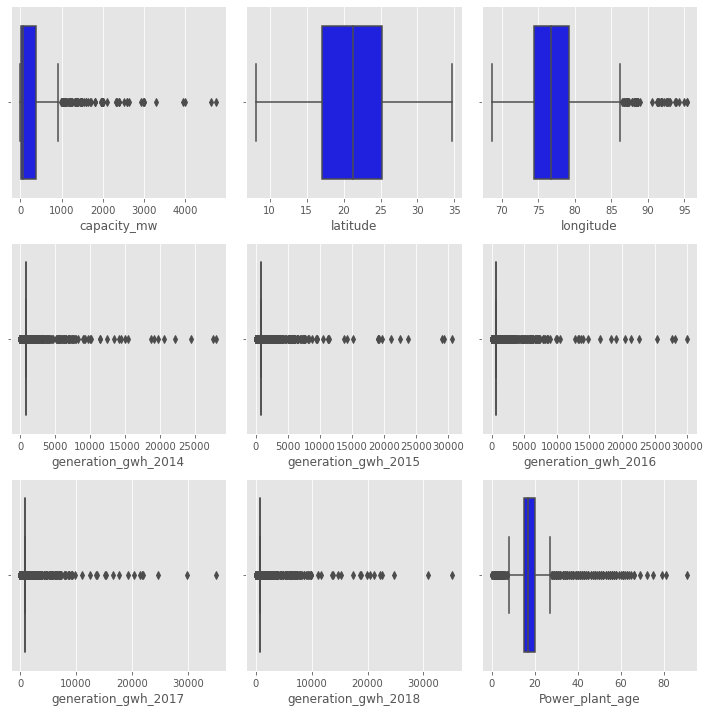

In [104]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


In [105]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [107]:
features = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','Power_plant_age']]

In [108]:
z=np.abs(zscore(features))

z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [109]:
new_df = df[(z<3).all(axis=1)] 
new_df


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [110]:
df.shape

(907, 13)

In [111]:
new_df.shape

(851, 13)

In [112]:
print("total_dropped_rows",df.shape[0] - new_df.shape[0])

total_dropped_rows 56


# Percentage data loss:

In [113]:
loss_percent=(907-851)/907*100
print(loss_percent,'%')

6.174200661521499 %


usually less than 10% data loss is acceptable

df_new is the new data set after all the unnecessary columns and all the outliers apart from target columns (with z<3 z score) are removed

# Correlation between the target variable and features

In [114]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'primary_fuel'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'source'),
  Text(0, 6.5, 'geolocation_source'),
  Text(0, 7.5, 'generation_gwh_2014'),
  Text(0, 8.5, 'generation_gwh_2015'),
  Text(0, 9.5, 'generation_gwh_2016'),
  Text(0, 10.5, 'generation_gwh_2017'),
  Text(0, 11.5, 'generation_gwh_2018'),
  Text(0, 12.5, 'Power_plant_age')])

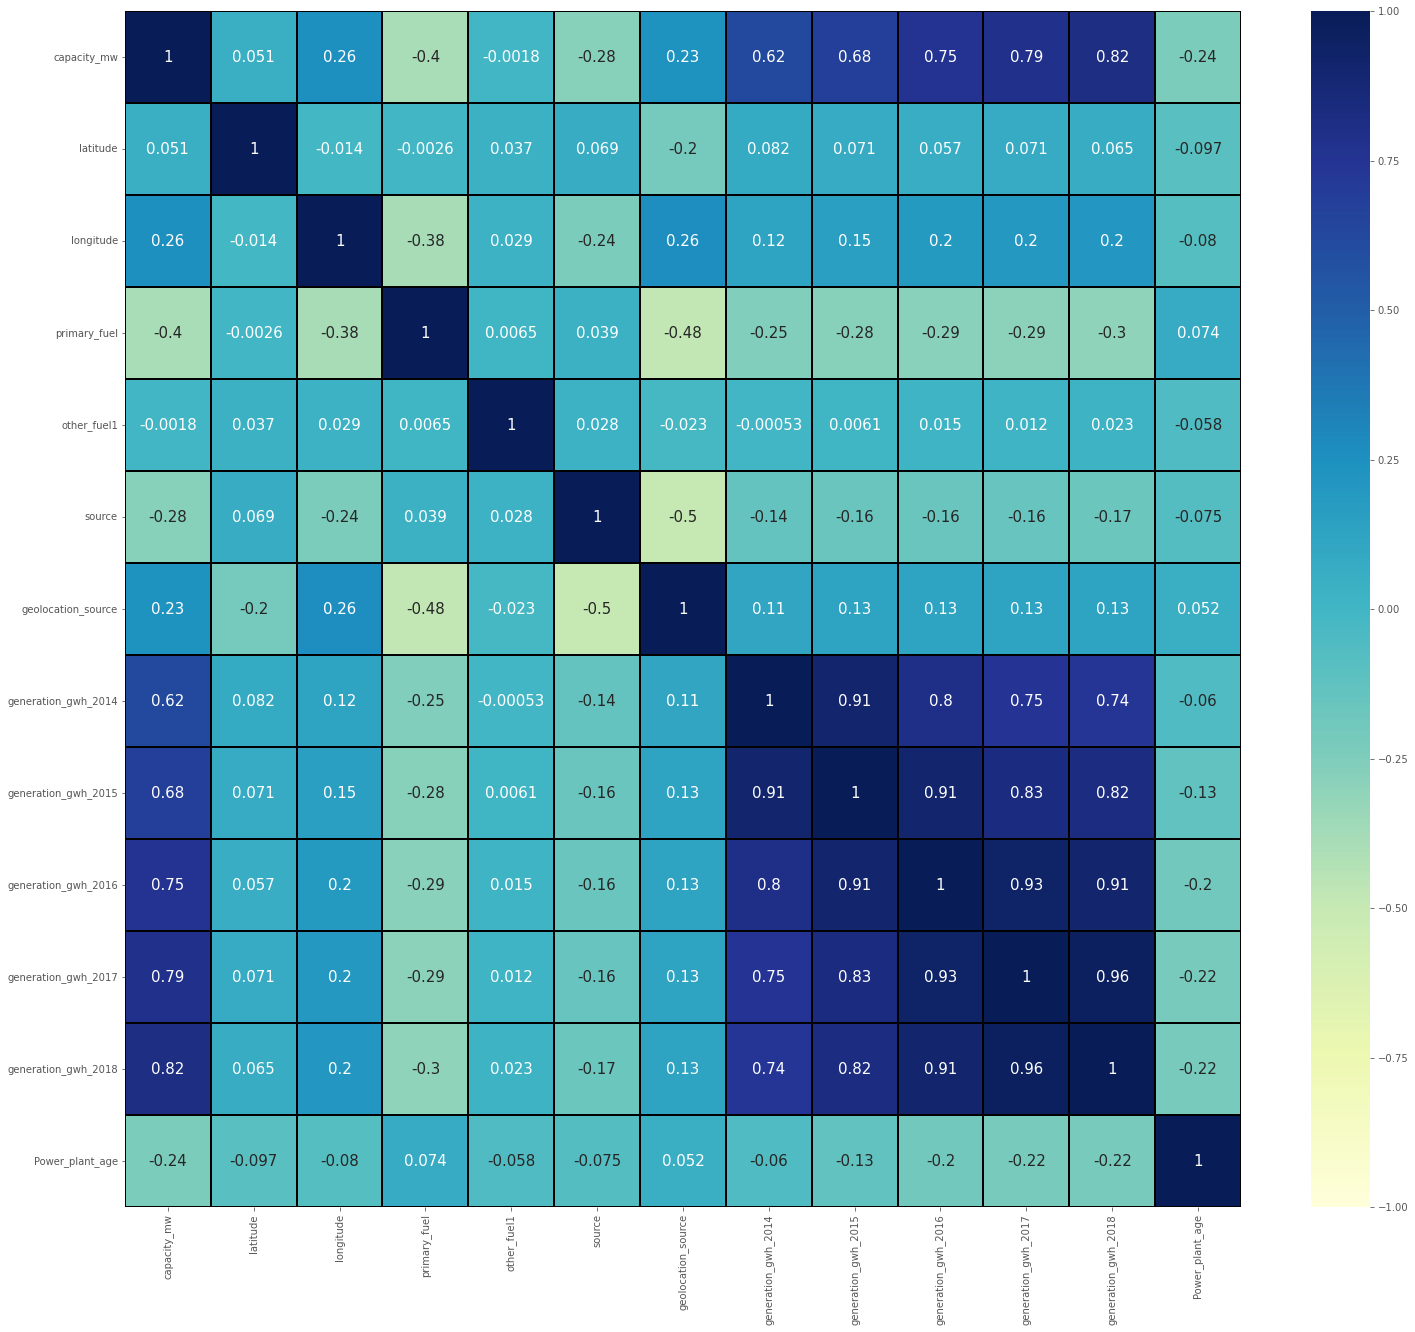

In [115]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [116]:
new_df.corr()['primary_fuel'].sort_values()

geolocation_source    -0.478601
capacity_mw           -0.398039
longitude             -0.382975
generation_gwh_2018   -0.298364
generation_gwh_2017   -0.289232
generation_gwh_2016   -0.286624
generation_gwh_2015   -0.276308
generation_gwh_2014   -0.250101
latitude              -0.002561
other_fuel1            0.006463
source                 0.038558
Power_plant_age        0.074358
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

In [117]:
new_df.corr()['capacity_mw'].sort_values()

primary_fuel          -0.398039
source                -0.275724
Power_plant_age       -0.241487
other_fuel1           -0.001758
latitude               0.050588
geolocation_source     0.234543
longitude              0.257582
generation_gwh_2014    0.620202
generation_gwh_2015    0.680949
generation_gwh_2016    0.750088
generation_gwh_2017    0.788972
generation_gwh_2018    0.815198
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age. The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

# Visualizing the correlation between label and features using bar plot

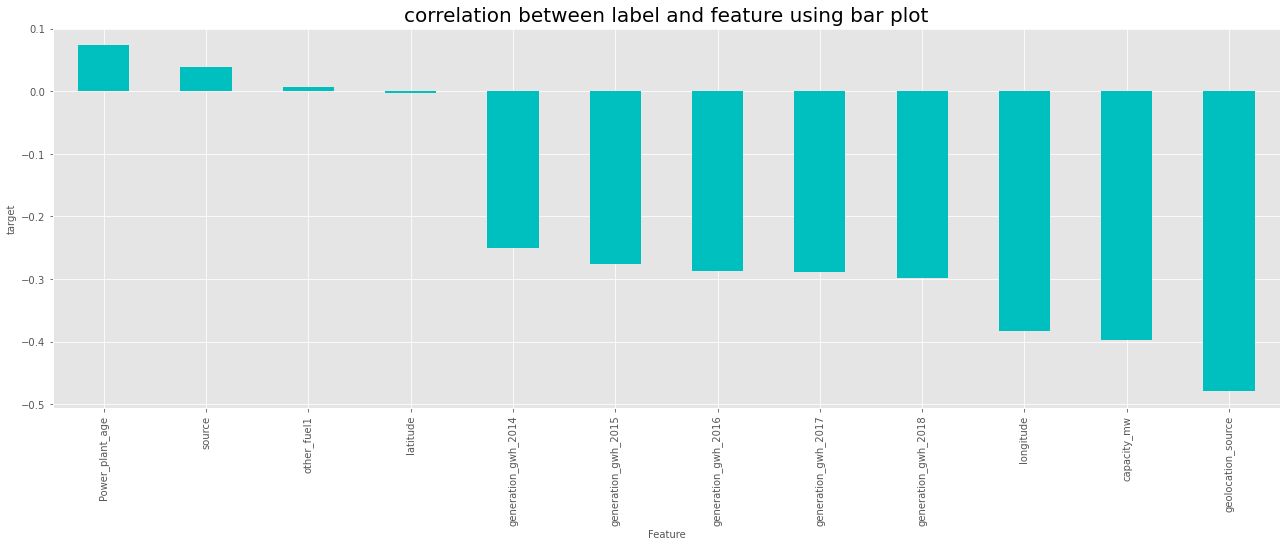

In [118]:
plt.figure(figsize=(22,7))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# MultiCollinearity with Variance Inflation Factor

In [119]:
df1=pd.DataFrame(data=new_df)       
df1

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [120]:
x1=df1.iloc[:,1:]
y1=df1.iloc[:,0]

In [121]:
x1

,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [122]:
y1

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 851, dtype: float64

In [123]:
x1.shape

(851, 12)

In [124]:
y1.shape

(851,)

In [125]:
x1.shape[1]

12

In [126]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [128]:
calc_vif(x1)

,variables,VIF FACTOR
0,latitude,13.872461
1,longitude,244.574821
2,primary_fuel,4.644438
3,other_fuel1,279.902398
4,source,2.932705
5,geolocation_source,13.596524
6,generation_gwh_2014,10.519302
7,generation_gwh_2015,20.375290
8,generation_gwh_2016,22.939038
9,generation_gwh_2017,30.883761


other_fuel1 has the highest VIF FACTOR hence drop it first

In [129]:
x1=df1.drop(['other_fuel1'],axis=1)

In [130]:
calc_vif(x1)

,variables,VIF FACTOR
0,capacity_mw,4.925265
1,latitude,13.421012
2,longitude,47.409391
3,primary_fuel,4.210582
4,source,2.833991
5,geolocation_source,12.954951
6,generation_gwh_2014,10.551644
7,generation_gwh_2015,20.382745
8,generation_gwh_2016,22.935981
9,generation_gwh_2017,30.879133


In [131]:
x1=df1.drop(['other_fuel1','latitude'],axis=1)

In [132]:
calc_vif(x1)

,variables,VIF FACTOR
0,capacity_mw,4.924663
1,longitude,31.060239
2,primary_fuel,4.210062
3,source,2.832397
4,geolocation_source,12.580994
5,generation_gwh_2014,10.525915
6,generation_gwh_2015,20.377171
7,generation_gwh_2016,22.860138
8,generation_gwh_2017,30.817585
9,generation_gwh_2018,25.665932


Feature selection by dropping columns

In [133]:
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [134]:
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


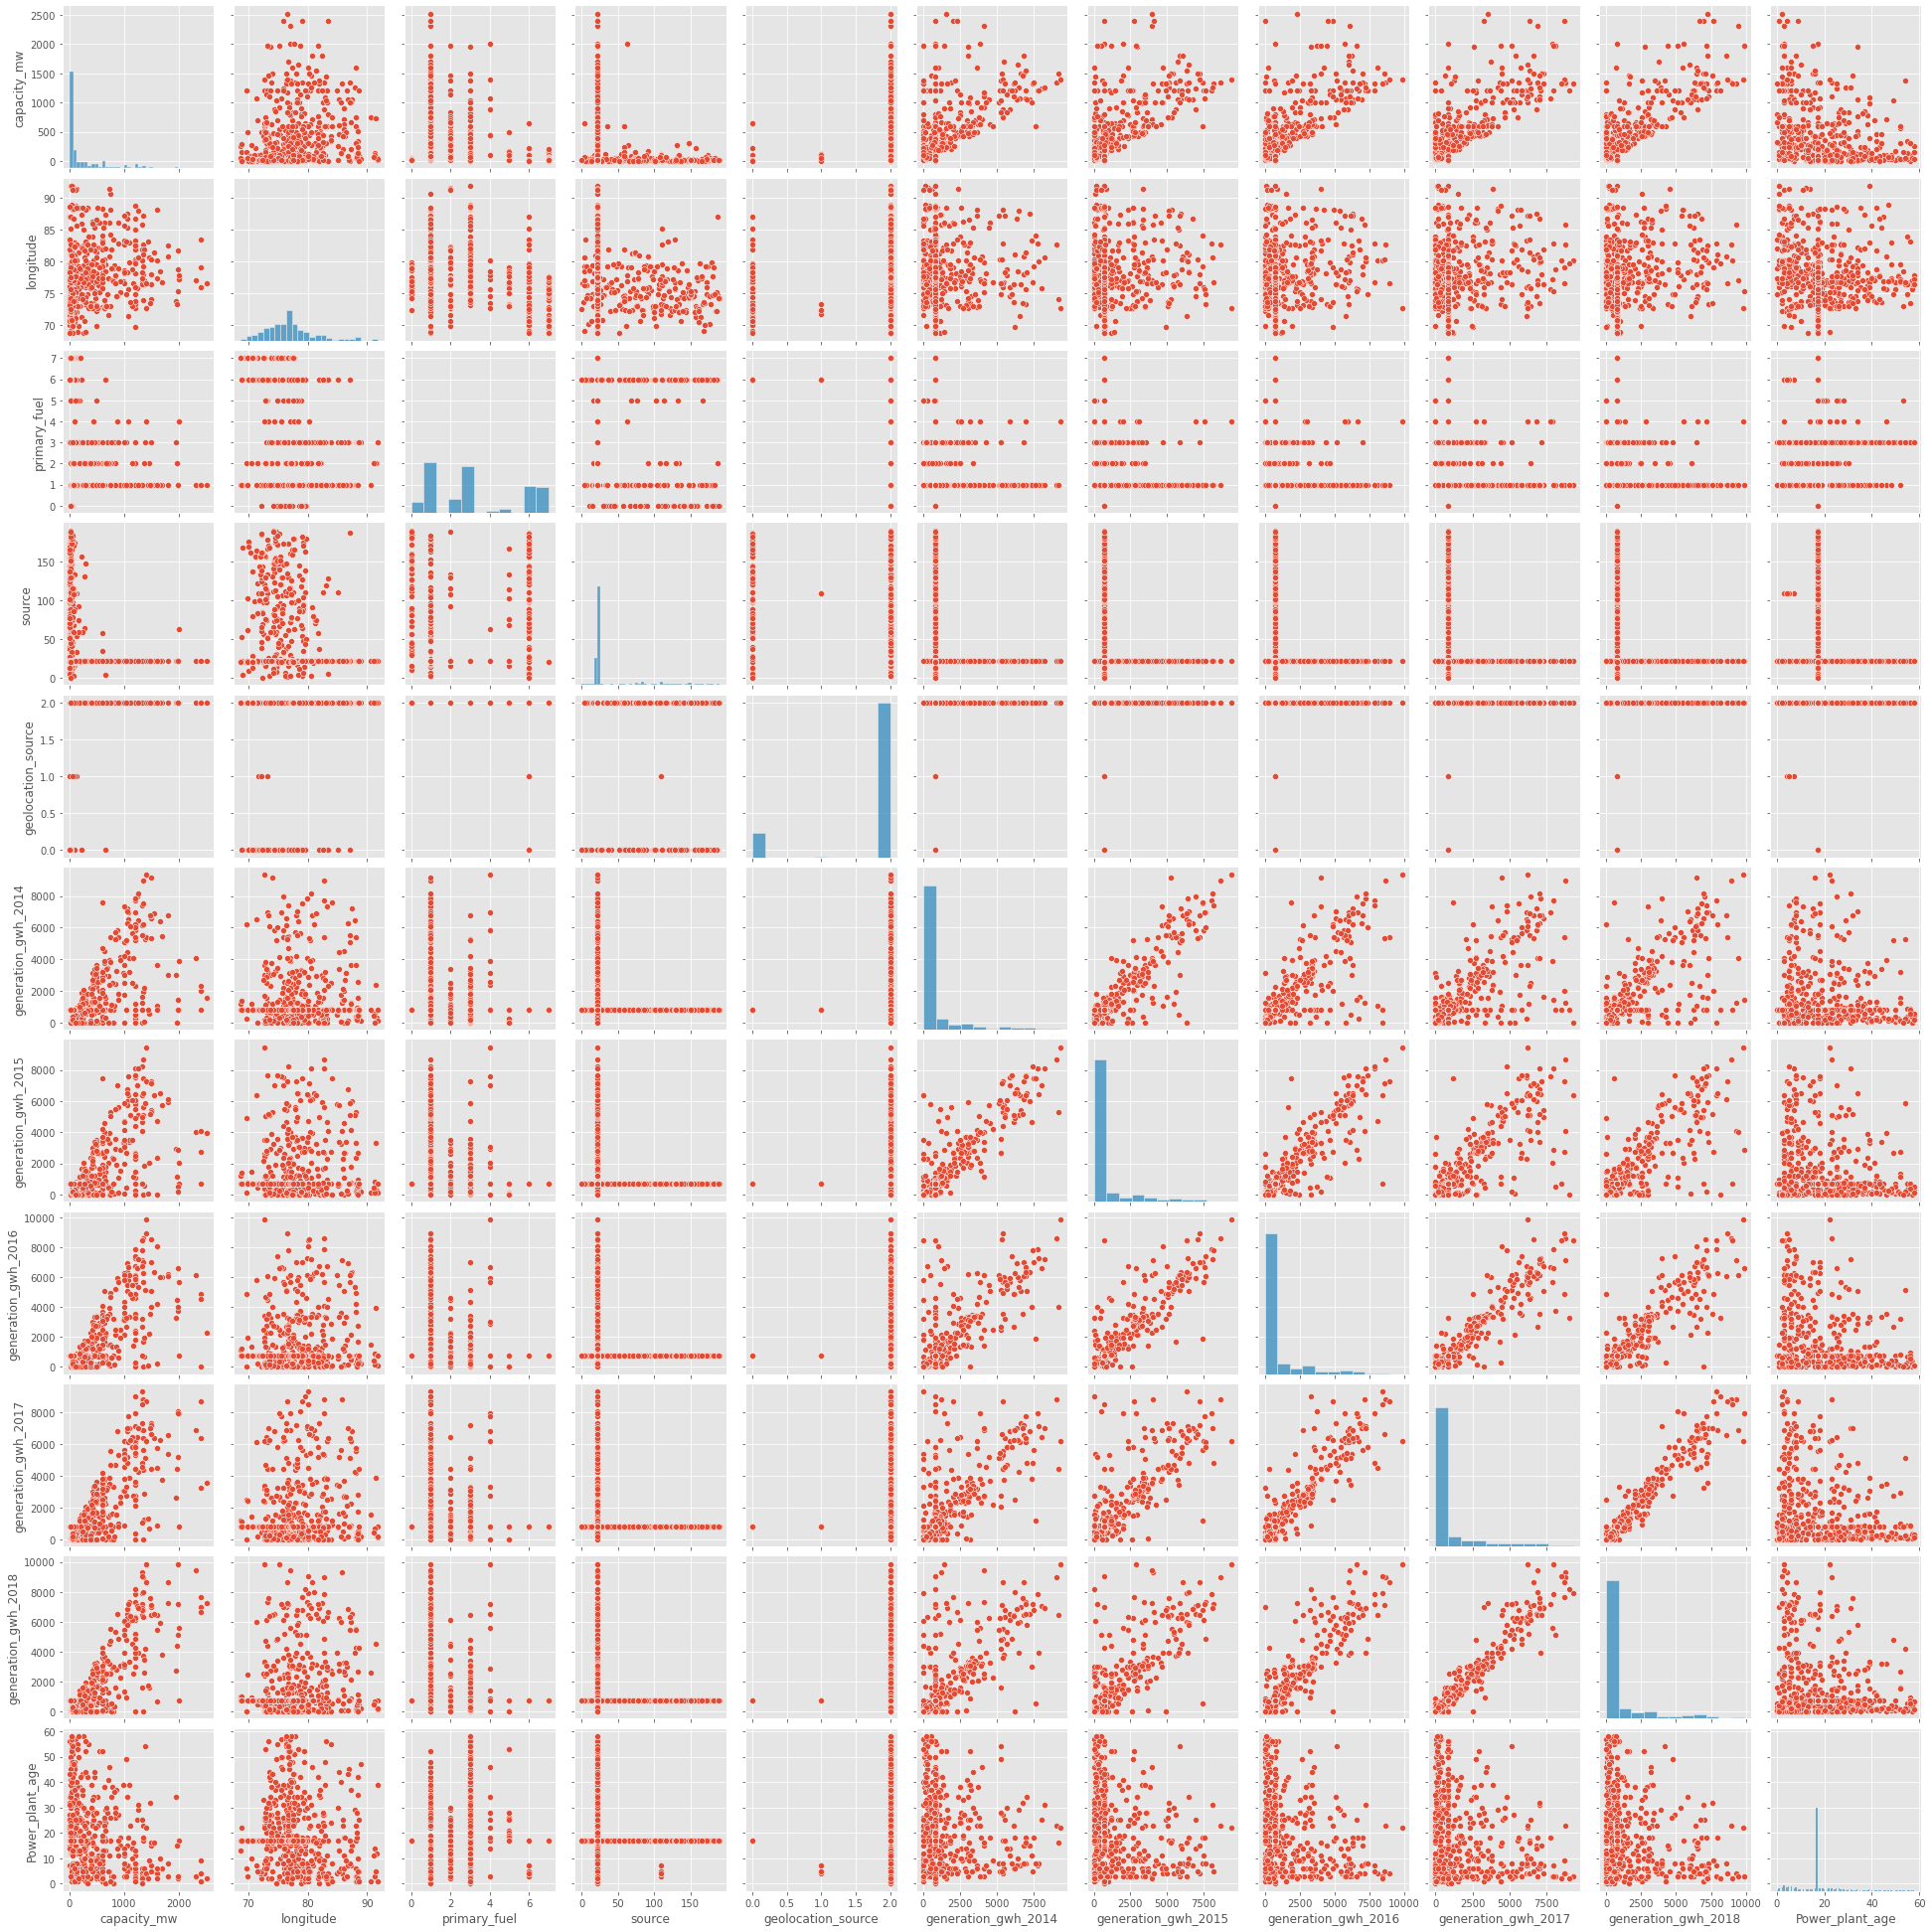

In [135]:
sns.pairplot(new_df)

# Machine Learning

# Predicting "Capacity_mw" Target

In [136]:
x=new_df.drop('capacity_mw', axis=1)
y=new_df["capacity_mw"]

In [137]:
x.shape

(851, 10)

In [138]:
y.shape

(851,)

In [139]:
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...
902,77.3568,1,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,78.1654,6,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,75.5811,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,73.7477,1,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [140]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 851, dtype: float64

# Checking for skewness

In [141]:
x.skew().sort_values()

geolocation_source    -2.066536
primary_fuel           0.413759
longitude              0.945877
Power_plant_age        1.280800
source                 1.734252
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
generation_gwh_2016    2.645786
generation_gwh_2015    2.714999
generation_gwh_2014    2.943026
dtype: float64

longitude generation_gwh_2013 generation_gwh_2014 generation_gwh_2015 generation_gwh_2016 generation_gwh_2017 Power_plant_age columns have skewness more than +0.5 and -0.5.

# Removing skewness using yeo-johnson method

In [142]:
from sklearn.preprocessing import PowerTransformer
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
transf = PowerTransformer(method='yeo-johnson')

In [143]:
x[skew] = transf.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [144]:
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

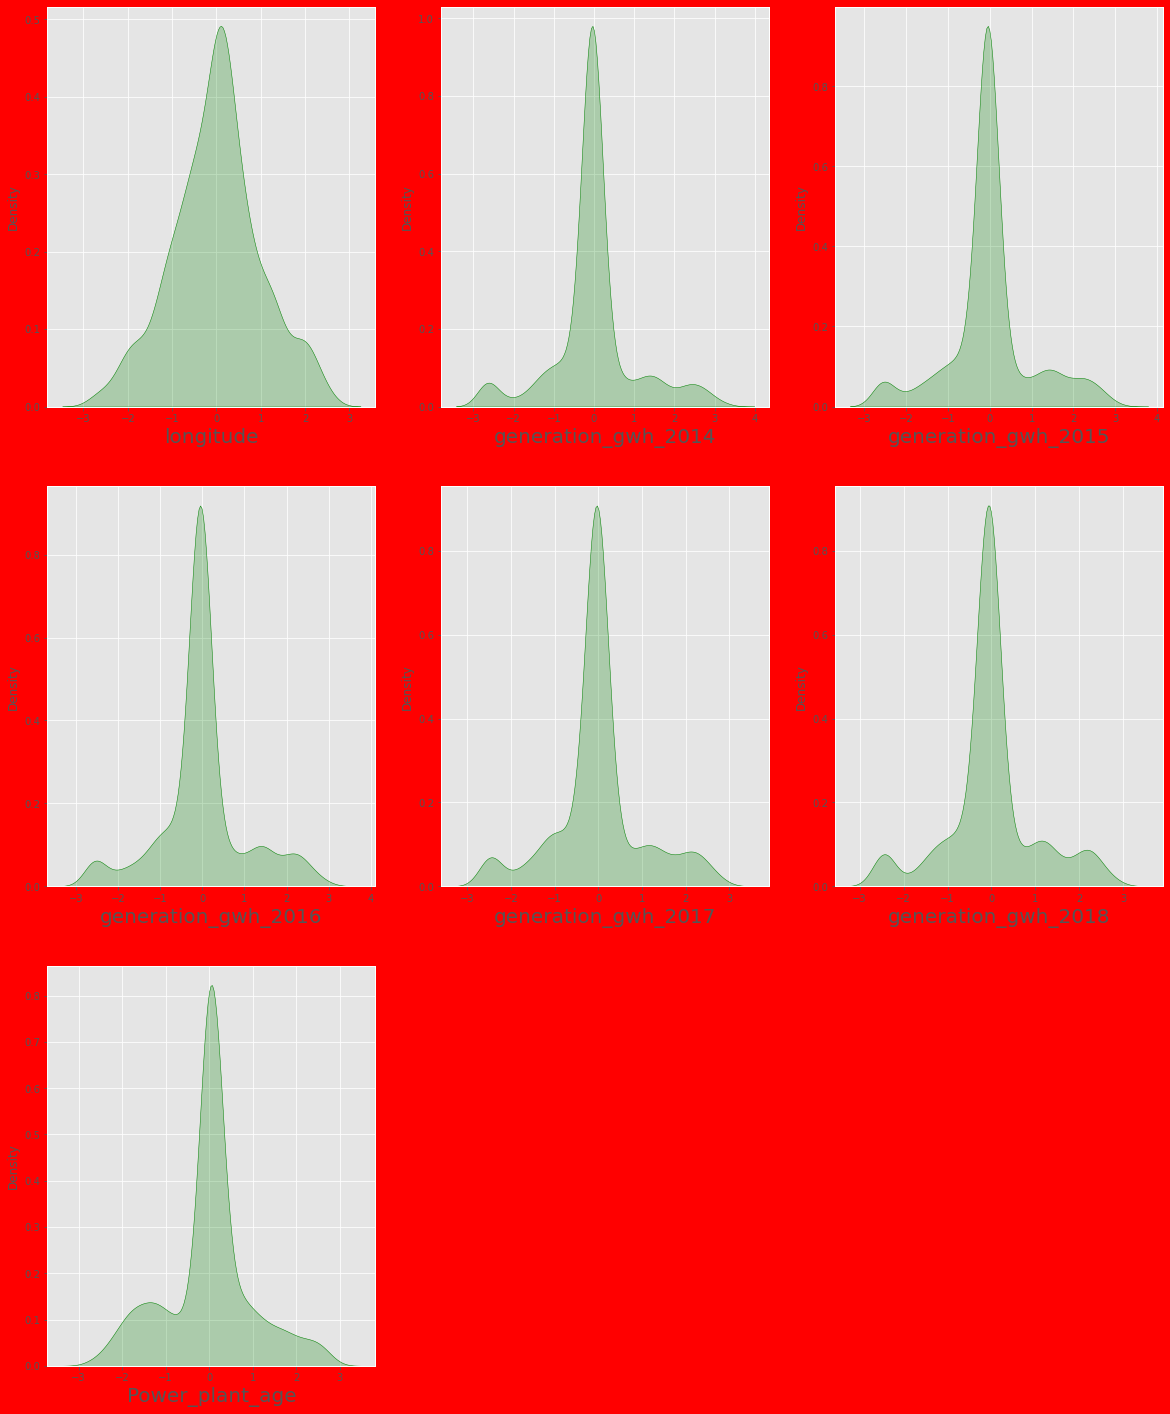

In [147]:
plt.figure(figsize=(20,25), facecolor='red')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Feature Scalling

In [148]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


# MultiCollinearity with Variance Inflation Factor

In [149]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns


vif

,VIF values,Features
0,1.309948,longitude
1,1.682645,primary_fuel
2,1.503721,source
3,1.875750,geolocation_source
4,3.603333,generation_gwh_2014
5,6.182235,generation_gwh_2015
6,9.957776,generation_gwh_2016
7,9.750143,generation_gwh_2017
8,8.951489,generation_gwh_2018
9,1.102659,Power_plant_age


VIF values in all the columns are less then 10, hence no multicolinearity problem exists.

# Finding best random state

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [152]:
maxAccu=0
maxRS=0
for i in range(1,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.20,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.885744240474326 Random_State 111


In [154]:
maxAccu=0
maxRS=0
for i in range(1,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8605427837832498 Random_State 185


We got best r2 score of 0.885 at a random state of 111 for test_size=.20

# Train_test_Split

In [155]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=111)


In [156]:
# importing all the required libraries

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [157]:
def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=111)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

# Linear Regression

In [158]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 238.35112191622963
R2 Score is: 70.20759692789215
Cross Validation Score is: 54.40434259567007
R2 Score - Cross Validation Score is 15.803254332222082


# L1 -- Lasso Regression

In [159]:
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 238.3517314354893
R2 Score is: 70.20744455548848
Cross Validation Score is: 54.40459227008451
R2 Score - Cross Validation Score is 15.802852285403972


# L2 -- Ridge Regression

In [160]:
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 238.35115330908218
R2 Score is: 70.20758908007025
Cross Validation Score is: 54.40437885767844
R2 Score - Cross Validation Score is 15.803210222391812


# Elastic Net

In [161]:
model=ElasticNet(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 238.3621298054275
R2 Score is: 70.20484502941319
Cross Validation Score is: 54.41670015581644
R2 Score - Cross Validation Score is 15.78814487359675


# Support Vector Regression

In [162]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 450.5755968198599
R2 Score is: -6.464904129093907
Cross Validation Score is: -11.39657492770902
R2 Score - Cross Validation Score is 4.931670798615113


In [163]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 328.79221110711256
R2 Score is: 43.308992438840065
Cross Validation Score is: 26.42896802921331
R2 Score - Cross Validation Score is 16.880024409626756


In [164]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 291.9050386632014
R2 Score is: 55.315766026347845
Cross Validation Score is: 43.403823512262655
R2 Score - Cross Validation Score is 11.91194251408519


# Decision Tree Regressor

In [165]:
model=DecisionTreeRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 271.08303547064065
R2 Score is: 61.463185351496705
Cross Validation Score is: 58.76758704001117
R2 Score - Cross Validation Score is 2.695598311485533


In [166]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 259.0732251995529
R2 Score is: 64.80214503403204
Cross Validation Score is: 57.96005272392926
R2 Score - Cross Validation Score is 6.842092310102778


# Random Forest Regressor

In [167]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 152.2567143692965
R2 Score is: 87.84306648889368
Cross Validation Score is: 77.89586690781707
R2 Score - Cross Validation Score is 9.947199581076617


In [168]:
model=RandomForestRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 149.26126083198395
R2 Score is: 88.31670491545745
Cross Validation Score is: 78.16052670518994
R2 Score - Cross Validation Score is 10.156178210267512


# K Neighbors Regressor

In [169]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 139.12311555325957
R2 Score is: 89.84991396029697
Cross Validation Score is: 72.4607518724892
R2 Score - Cross Validation Score is 17.389162087807776


# SGD Regressor

In [170]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 241.7663927601712
R2 Score is: 69.34770507544825
Cross Validation Score is: 54.97990115112575
R2 Score - Cross Validation Score is 14.367803924322494


# Gradient Boosting Regressor

In [171]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 157.81280047952015
R2 Score is: 86.93962678705614
Cross Validation Score is: 75.07109044359763
R2 Score - Cross Validation Score is 11.868536343458516


# Ada Boost Regressor

In [172]:
model=AdaBoostRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 236.63014156492585
R2 Score is: 70.6362673557781
Cross Validation Score is: 58.66999364833373
R2 Score - Cross Validation Score is 11.966273707444373


In [173]:
model=AdaBoostRegressor()
regressor(model, x, y)

Root Mean Square Error is: 251.16165570989472
R2 Score is: 66.9190624982593
Cross Validation Score is: 58.65943079516346
R2 Score - Cross Validation Score is 8.259631703095835


# Extra Trees Regressor

In [174]:
model=ExtraTreesRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 153.0608707783595
R2 Score is: 87.71431167352259
Cross Validation Score is: 79.43962573802399
R2 Score - Cross Validation Score is 8.274685935498596


In [175]:
model=ExtraTreesRegressor()
regressor(model, x, y)

Root Mean Square Error is: 150.26195684334388
R2 Score is: 88.15952255898986
Cross Validation Score is: 78.8914652677443
R2 Score - Cross Validation Score is 9.268057291245569


# Hyper parameter tuning

In [176]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [177]:
parameters = {'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15]}

In [178]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [179]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15]})

In [180]:
GCV.best_params_

{'criterion': 'squared_error', 'max_features': 'auto', 'n_jobs': 10}

In [181]:
final_model = ExtraTreesRegressor(criterion = 'absolute_error', max_features = 'log2', n_jobs = 15)

In [182]:
final_fit = final_model.fit(x_train,y_train) 

In [183]:
final_pred = final_model.predict(x_test)

In [184]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100  
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 89.52278628528953


In [185]:
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 79.1662715086572


In [186]:
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 141.34724052904093


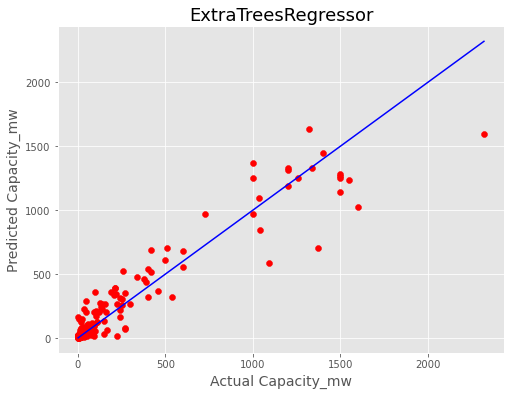

In [187]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt1 = max(max(final_pred), max(y_test))
plt2 = min(min(final_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Capacity_mw', fontsize=14)
plt.ylabel('Predicted Capacity_mw', fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

Hence after Hyper Parameter Tuning on the final model to obtained the best r2_score 89.522% and CV score 79.1% and lowest Root Mean Square Error is: 141.347.

# Saving the model in pickle Format

In [188]:
import pickle
filename = 'Global_Power_Plant_Capacity_mw_Regression_final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

# Prediction Conclusion:

In [189]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,5.000,5.0000
1,270.000,78.8365
2,25.500,36.4585
3,5.000,2.8400
4,374.571,464.7407
...,...,...
166,220.000,344.6899
167,270.000,68.7510
168,126.000,270.3890
169,5.000,148.9000


In [190]:
df_comparison.to_csv('Global_Power_Plant_Capacity_mw_Regression_Prediction.csv')

# Predicting "primary_fuel" Target

Seperating the Dataset into Features and Label(primary_fuel)

In [192]:
x_df = new_df.drop("primary_fuel", axis=1)
y_df = new_df["primary_fuel"]

In [193]:
x_df.shape

(851, 10)

In [194]:
y_df.shape

(851,)

# Checking the Skewness of x_df

In [195]:
x_df.skew().sort_values()

geolocation_source    -2.066536
longitude              0.945877
Power_plant_age        1.280800
source                 1.734252
capacity_mw            2.170245
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
generation_gwh_2016    2.645786
generation_gwh_2015    2.714999
generation_gwh_2014    2.943026
dtype: float64

# Removing the skewness

In [196]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
transfo = PowerTransformer(method='yeo-johnson')

In [197]:
x_df[skew] = transfo.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [198]:
x_df.skew().sort_values()

geolocation_source    -2.066536
longitude             -0.000128
capacity_mw            0.016303
Power_plant_age        0.043734
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
generation_gwh_2016    0.147035
generation_gwh_2015    0.163587
generation_gwh_2014    0.232399
source                 1.734252
dtype: float64

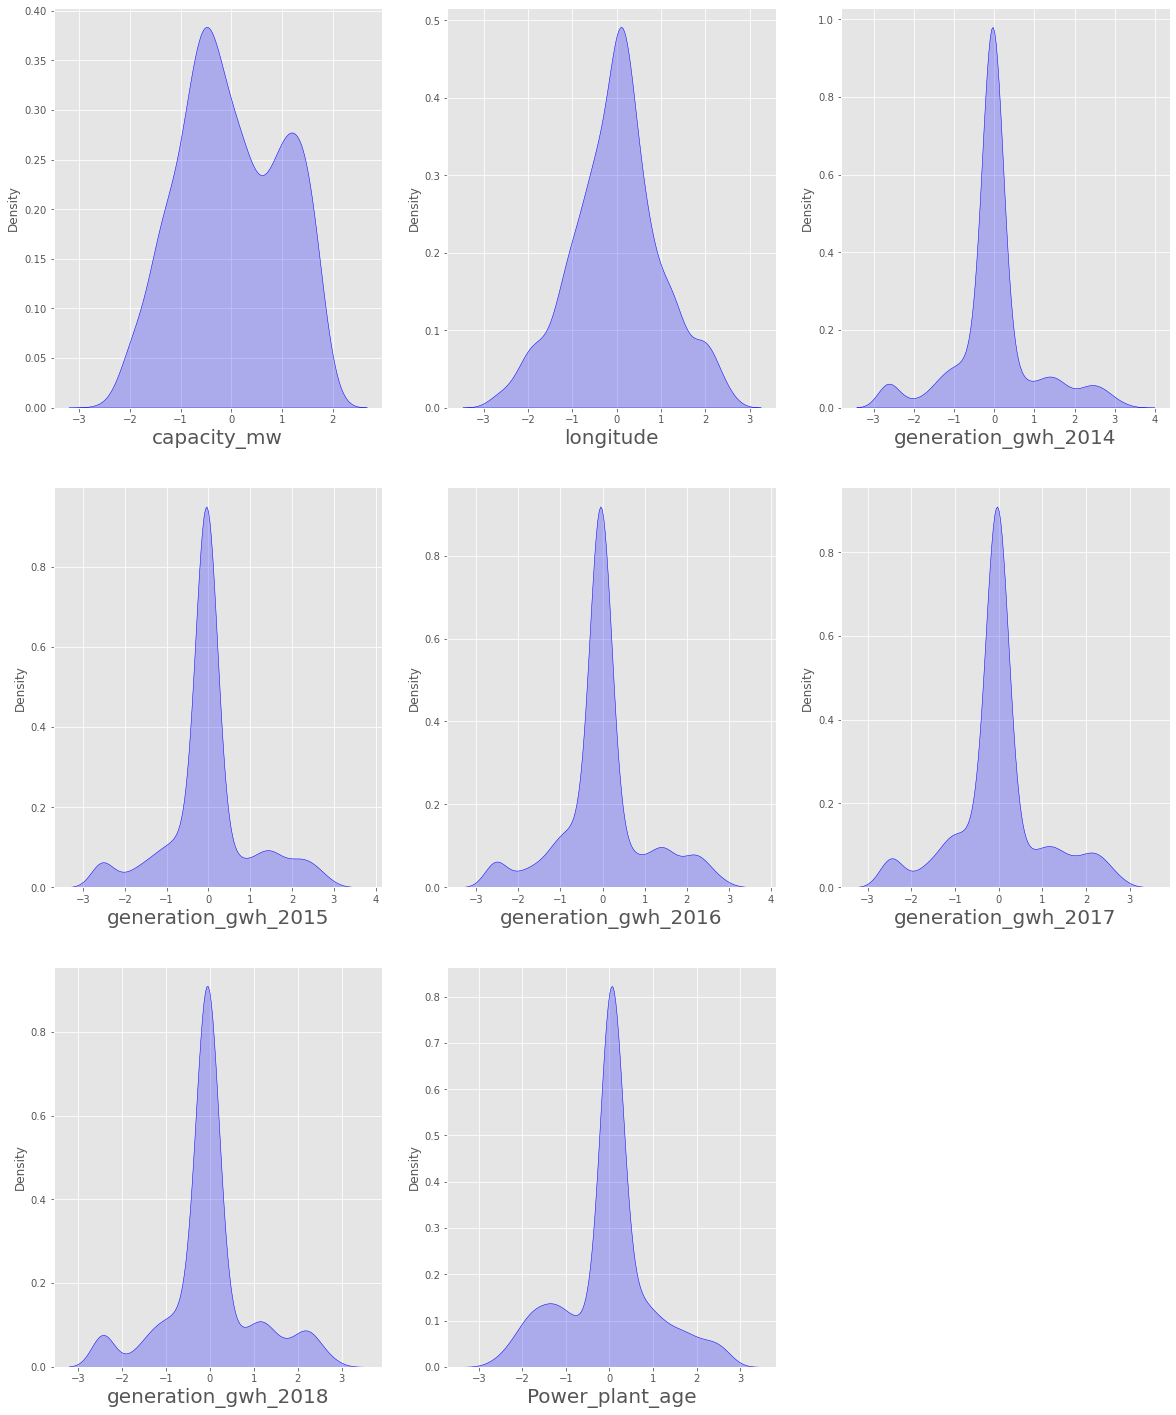

In [199]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Feature Scaling

In [200]:
scaler=StandardScaler()
x_df=pd.DataFrame(scaler.fit_transform(x_df),columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


# Checking Multicolinearity

In [202]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

vif

,VIF values,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


All the columns has vif values less then 10, hence there is no multicolinearity that exist.

In [203]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

# SMOTE OverSampling

In [204]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_df, y_df = sm.fit_resample(x_df,y_df)

In [205]:
y_df.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

In [208]:
X = x_df # renaming the features variable

In [209]:
X

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
1899,-0.138269,-0.320981,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
1900,-0.086791,0.198540,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
1901,-0.135774,-0.477564,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
1902,-0.959203,0.222613,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


In [210]:
Y = y_df   # renaming the target variable

In [211]:
Y

0       6
1       1
2       7
3       2
4       1
       ..
1899    7
1900    7
1901    7
1902    7
1903    7
Name: primary_fuel, Length: 1904, dtype: int32

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Getting the best random state

In [213]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=.20, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.9501312335958005  on Random_state  46


Hence we get best accuracy score as 0.950 at Random_state 46 in RandomForestClassifier

# train_test_split

In [214]:
x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=.20, random_state=46)

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [216]:
def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=46) 
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

# Logistic Regression

In [217]:
model = LogisticRegression()
classifier(model, X, Y)

Accuracy Score: 74.01574803149606

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        37
           1       0.74      0.54      0.63        57
           2       0.60      0.38      0.46        48
           3       0.44      0.42      0.43        43
           4       0.76      0.94      0.84        50
           5       0.75      0.95      0.84        44
           6       1.00      0.96      0.98        46
           7       0.76      0.89      0.82        56

    accuracy                           0.74       381
   macro avg       0.73      0.74      0.73       381
weighted avg       0.73      0.74      0.73       381

Cross Validation Score: 72.42464428788506

Accuracy Score - Cross Validation Score is 1.5911037436110007


# Naive Bayes

In [218]:
model = GaussianNB()
classifier(model, X, Y)

Accuracy Score: 56.69291338582677

Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68        37
           1       0.73      0.14      0.24        57
           2       0.00      0.00      0.00        48
           3       0.24      0.70      0.36        43
           4       0.73      0.60      0.66        50
           5       0.64      0.20      0.31        44
           6       0.77      1.00      0.87        46
           7       1.00      1.00      1.00        56

    accuracy                           0.57       381
   macro avg       0.58      0.58      0.51       381
weighted avg       0.60      0.57      0.52       381

Cross Validation Score: 59.769028871391086

Accuracy Score - Cross Validation Score is -3.0761154855643156


# SVC Classifier

In [219]:
model = SVC(kernel='rbf')
classifier(model, X, Y)

Accuracy Score: 81.62729658792651

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.84      0.56      0.67        57
           2       0.74      0.65      0.69        48
           3       0.79      0.60      0.68        43
           4       0.89      0.96      0.92        50
           5       0.75      0.95      0.84        44
           6       1.00      1.00      1.00        46
           7       0.75      0.98      0.85        56

    accuracy                           0.82       381
   macro avg       0.82      0.82      0.81       381
weighted avg       0.82      0.82      0.81       381

Cross Validation Score: 80.04033706313027

Accuracy Score - Cross Validation Score is 1.5869595247962422


In [220]:
model = SVC(kernel='linear')
classifier(model, X, Y)

Accuracy Score: 80.31496062992126

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        37
           1       0.72      0.60      0.65        57
           2       0.68      0.44      0.53        48
           3       0.55      0.56      0.55        43
           4       0.88      1.00      0.93        50
           5       0.76      0.95      0.85        44
           6       1.00      0.98      0.99        46
           7       0.87      0.98      0.92        56

    accuracy                           0.80       381
   macro avg       0.79      0.81      0.79       381
weighted avg       0.79      0.80      0.79       381

Cross Validation Score: 79.09559331399365

Accuracy Score - Cross Validation Score is 1.219367315927613


In [221]:
model = SVC(kernel='poly')
classifier(model, X, Y)

Accuracy Score: 69.81627296587926

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        37
           1       0.97      0.54      0.70        57
           2       0.90      0.38      0.53        48
           3       0.81      0.49      0.61        43
           4       0.94      0.88      0.91        50
           5       0.87      0.61      0.72        44
           6       1.00      0.96      0.98        46
           7       0.39      1.00      0.56        56

    accuracy                           0.70       381
   macro avg       0.82      0.69      0.71       381
weighted avg       0.82      0.70      0.71       381

Cross Validation Score: 65.23069484735461

Accuracy Score - Cross Validation Score is 4.585578118524651


# Decision Tree Classifier

In [222]:
model = DecisionTreeClassifier()
classifier(model, X, Y)

Accuracy Score: 90.28871391076116

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        37
           1       0.82      0.65      0.73        57
           2       0.85      0.94      0.89        48
           3       0.77      0.79      0.78        43
           4       0.96      1.00      0.98        50
           5       0.87      0.93      0.90        44
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        56

    accuracy                           0.90       381
   macro avg       0.90      0.91      0.90       381
weighted avg       0.90      0.90      0.90       381

Cross Validation Score: 87.07874015748031

Accuracy Score - Cross Validation Score is 3.209973753280849


# KNeighbors Classifier

In [223]:
model = KNeighborsClassifier()
classifier(model, X, Y)

Accuracy Score: 87.4015748031496

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        37
           1       0.89      0.56      0.69        57
           2       0.81      0.90      0.85        48
           3       0.84      0.72      0.77        43
           4       0.92      0.96      0.94        50
           5       0.85      1.00      0.92        44
           6       1.00      1.00      1.00        46
           7       0.86      0.98      0.92        56

    accuracy                           0.87       381
   macro avg       0.87      0.88      0.87       381
weighted avg       0.88      0.87      0.87       381

Cross Validation Score: 85.3460422710319

Accuracy Score - Cross Validation Score is 2.055532532117695


# SGD Classifier

In [224]:
model = SGDClassifier()
classifier(model, X, Y)

Accuracy Score: 66.66666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.81      0.39      0.52        57
           2       0.35      0.73      0.47        48
           3       0.52      0.26      0.34        43
           4       0.67      0.66      0.67        50
           5       0.69      0.45      0.55        44
           6       1.00      1.00      1.00        46
           7       0.80      0.93      0.86        56

    accuracy                           0.67       381
   macro avg       0.71      0.67      0.66       381
weighted avg       0.71      0.67      0.66       381

Cross Validation Score: 61.44522724133168

Accuracy Score - Cross Validation Score is 5.221439425334978


# Random Forest Classifier

In [225]:
model = RandomForestClassifier(random_state=142)
classifier(model, X, Y)

Accuracy Score: 94.22572178477691

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.95      0.74      0.83        57
           2       0.87      0.98      0.92        48
           3       0.93      0.91      0.92        43
           4       0.96      1.00      0.98        50
           5       0.90      0.98      0.93        44
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        56

    accuracy                           0.94       381
   macro avg       0.94      0.95      0.94       381
weighted avg       0.94      0.94      0.94       381

Cross Validation Score: 91.49053736703964

Accuracy Score - Cross Validation Score is 2.7351844177372726


In [226]:
model = RandomForestClassifier()
classifier(model, X, Y)

Accuracy Score: 94.48818897637796

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.98      0.75      0.85        57
           2       0.87      0.96      0.91        48
           3       0.93      0.93      0.93        43
           4       0.96      1.00      0.98        50
           5       0.88      0.98      0.92        44
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        56

    accuracy                           0.94       381
   macro avg       0.95      0.95      0.94       381
weighted avg       0.95      0.94      0.94       381

Cross Validation Score: 91.49067550766681

Accuracy Score - Cross Validation Score is 2.9975134687111478


# ExtraTrees Classifier

In [227]:
model = ExtraTreesClassifier()
classifier(model, X, Y)

Accuracy Score: 94.22572178477691

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.98      0.75      0.85        57
           2       0.82      0.94      0.87        48
           3       0.93      0.91      0.92        43
           4       1.00      1.00      1.00        50
           5       0.90      0.98      0.93        44
           6       1.00      1.00      1.00        46
           7       0.98      1.00      0.99        56

    accuracy                           0.94       381
   macro avg       0.94      0.95      0.94       381
weighted avg       0.95      0.94      0.94       381

Cross Validation Score: 91.5435833678685

Accuracy Score - Cross Validation Score is 2.6821384169084155


# AdaBoost Classifier

In [228]:
model = AdaBoostClassifier()
classifier(model, X, Y)

Accuracy Score: 26.77165354330709

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.97      0.25        37
           1       0.24      0.39      0.30        57
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        44
           6       1.00      0.96      0.98        46
           7       0.00      0.00      0.00        56

    accuracy                           0.27       381
   macro avg       0.17      0.29      0.19       381
weighted avg       0.17      0.27      0.19       381

Cross Validation Score: 28.361652161900818

Accuracy Score - Cross Validation Score is -1.5899986185937287


# Gradient Boosting Classifier

In [229]:
model = GradientBoostingClassifier()
classifier(model, X, Y)

Accuracy Score: 93.43832020997375

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.92      0.81      0.86        57
           2       0.88      0.94      0.91        48
           3       0.89      0.93      0.91        43
           4       0.94      0.92      0.93        50
           5       0.91      0.95      0.93        44
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56

    accuracy                           0.93       381
   macro avg       0.93      0.94      0.93       381
weighted avg       0.94      0.93      0.93       381

Cross Validation Score: 89.70534604227103

Accuracy Score - Cross Validation Score is 3.7329741677027215


# Hyper Parameter Tuning

In [230]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=46)

In [231]:
parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15]}

In [232]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [233]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15]})

In [234]:
GCV.best_params_ 

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_jobs': 5}

In [235]:
final_modelc = ExtraTreesClassifier(criterion = 'gini', max_features = 'log2', n_jobs = 5)

In [236]:
final_fitc = final_modelc.fit(x_train,y_train)

In [237]:
final_predc = final_modelc.predict(x_test) 

In [238]:
best_acc_score = (accuracy_score(y_test, final_predc))*100    
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  95.2755905511811


We successfully performed the Hyper Parameter Tuning on the Final Model.

In [239]:
final_cv_score = (cross_val_score(final_modelc, X, Y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 91.80591241884238


We got final accuracy score of 95.275% and Cross Validation Score of 91.80% which is good

In [240]:
x_test.shape

(381, 10)

In [241]:
y_test.shape

(381,)

In [242]:
x_train.shape

(1523, 10)

In [243]:
y_train.shape

(1523,)

In [244]:
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.75      0.86        57
           2       0.88      0.96      0.92        48
           3       0.89      0.95      0.92        43
           4       1.00      1.00      1.00        50
           5       0.92      1.00      0.96        44
           6       1.00      1.00      1.00        46
           7       0.98      1.00      0.99        56

    accuracy                           0.95       381
   macro avg       0.95      0.96      0.95       381
weighted avg       0.96      0.95      0.95       381



In [245]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

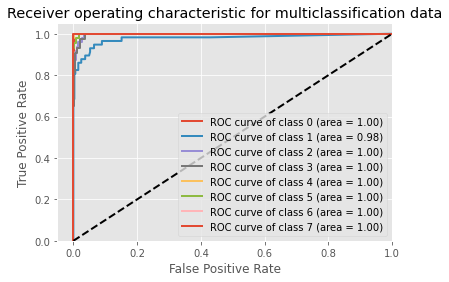

In [246]:
classifier = OneVsRestClassifier(final_modelc)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

Hence we got AUC ROC curve for all 8 classes which is either 0.99 or 1 which is good

# Saving the model in pickle Format

In [249]:
import pickle
filenamec = 'Global_Power_Plant_primary_fuel_Classification_final_model.pkl'
pickle.dump(final_modelc, open(filenamec, 'wb'))

# Prediction Conclusion:

In [250]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,1,1
1,4,4
2,6,6
3,1,1
4,0,0
...,...,...
376,2,2
377,1,1
378,1,1
379,5,5


Hence predicted the 'primary_fuel' using the x_test feature columns.

In [251]:
df_comparisonc.to_csv('Global_Power_Plant_primary_fuel_Classification_Prediction.csv')

Saving the predicted values in a csv file